In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
plt.style.use('seaborn-whitegrid')

In [2]:
close_prices = pd.read_csv('Data_SP500.csv', sep=',')

In [3]:
close_prices.set_index('Date', inplace = True)
close_prices.index = pd.to_datetime(close_prices.index)
close_prices.index = close_prices.index.sort_values()

In [4]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2013-01-02 to 2018-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1250 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


# VaR parameters

In [5]:
# 10 days projection
projection = np.sqrt(10)

# 99% level of confidence factor
factor = 2.33

# 1D log returns

In [6]:
close_prices['1D_log_ret'] = ''

for i in range(0, len(close_prices['SP500']), 1):
    if i < 1:
        close_prices['1D_log_ret'][i] = 0
        continue
    else:
        division = close_prices['SP500'][i]/close_prices['SP500'][i - 1]
        log_ret_1D = np.log(division)
        close_prices['1D_log_ret'][i] = log_ret_1D

C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/2116211817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['1D_log_ret'][i] = 0
C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/2116211817.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['1D_log_ret'][i] = log_ret_1D


In [7]:
close_prices

,SP500,1D_log_ret
Date,,
2013-01-02,1492.560059,0
2013-01-03,1494.810059,0.001506
2013-01-04,1494.819946,0.000007
2013-01-05,1502.959961,0.005431
2013-01-07,1500.180054,-0.001851
...,...,...
2017-12-29,2673.610107,-0.005197
2018-02-01,2695.810059,0.008269
2018-03-01,2713.060059,0.006378


# 10D forward log-returns

In [8]:
close_prices['10D_forward_log_ret'] = ''

for i in range(0, len(close_prices['SP500']), 1):
    if i > len(close_prices['SP500']) - 11:
        close_prices['10D_forward_log_ret'][i] = 0
        continue
    else:
        division = close_prices['SP500'][i]/close_prices['SP500'][i + 10]
        forward_log_ret_10D = np.log(division)
        close_prices['10D_forward_log_ret'][i] = forward_log_ret_10D

C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/2271220099.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['10D_forward_log_ret'][i] = forward_log_ret_10D
C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/2271220099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['10D_forward_log_ret'][i] = 0


In [9]:
close_prices

,SP500,1D_log_ret,10D_forward_log_ret
Date,,,
2013-01-02,1492.560059,0,-0.012471
2013-01-03,1494.810059,0.001506,-0.011513
2013-01-04,1494.819946,0.000007,-0.0097
2013-01-05,1502.959961,0.005431,-0.009911
2013-01-07,1500.180054,-0.001851,-0.011156
...,...,...,...
2017-12-29,2673.610107,-0.005197,0
2018-02-01,2695.810059,0.008269,0
2018-03-01,2713.060059,0.006378,0


# Volatility of 21 days

In [10]:
close_prices['21D_vol'] = ''

for i in range(0, len(close_prices['SP500']), 1):
    if i < 21:
        close_prices['21D_vol'][i] = 0
        continue
    else:
        init = i - 20
        std_dev = np.std(close_prices['1D_log_ret'].iloc[init:i])
        close_prices['21D_vol'][i] = std_dev

C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/4257973327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['21D_vol'][i] = 0
C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/4257973327.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['21D_vol'][i] = std_dev


In [11]:
close_prices.iloc[0:25]

,SP500,1D_log_ret,10D_forward_log_ret,21D_vol
Date,,,,
2013-01-02,1492.560059,0,-0.012471,0
2013-01-03,1494.810059,0.001506,-0.011513,0
2013-01-04,1494.819946,0.000007,-0.0097,0
2013-01-05,1502.959961,0.005431,-0.009911,0
2013-01-07,1500.180054,-0.001851,-0.011156,0
2013-01-08,1507.839966,0.005093,-0.007657,0
2013-01-10,1501.959961,-0.003907,-0.012156,0
2013-01-11,1498.109985,-0.002567,-0.015414,0
2013-01-22,1513.170044,0.010003,-0.004365,0


# Volatility of 42 days

In [12]:
close_prices['42D_vol'] = ''

for i in range(0, len(close_prices['SP500']), 1):
    if i < 42:
        close_prices['42D_vol'][i] = 0
        continue
    else:
        init = i - 41
        std_dev = np.std(close_prices['1D_log_ret'].iloc[init:i])
        close_prices['42D_vol'][i] = std_dev

C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/3961835755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['42D_vol'][i] = 0
C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/3961835755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['42D_vol'][i] = std_dev


In [13]:
close_prices

,SP500,1D_log_ret,10D_forward_log_ret,21D_vol,42D_vol
Date,,,,,
2013-01-02,1492.560059,0,-0.012471,0,0
2013-01-03,1494.810059,0.001506,-0.011513,0,0
2013-01-04,1494.819946,0.000007,-0.0097,0,0
2013-01-05,1502.959961,0.005431,-0.009911,0,0
2013-01-07,1500.180054,-0.001851,-0.011156,0,0
...,...,...,...,...,...
2017-12-29,2673.610107,-0.005197,0,0.003578,0.003575
2018-02-01,2695.810059,0.008269,0,0.003453,0.003703
2018-03-01,2713.060059,0.006378,0,0.003791,0.003872


# VaR of 10 days using 21D volatility

In [14]:
close_prices['VAR_10Dproj_21D_vol'] = ''
control = 1

for i in range(0, len(close_prices), 1):
    if close_prices['21D_vol'][i] == '':
        close_prices['VAR_10Dproj_21D_vol'][i] = 0
        continue
    else:
        if control == 11 or control == 1:
            var = - factor * close_prices['21D_vol'][i] * projection
            control = 1
        else:
            var = var
        close_prices['VAR_10Dproj_21D_vol'][i] = var
        control = control + 1

C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/3621261573.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['VAR_10Dproj_21D_vol'][i] = var


In [15]:
close_prices

,SP500,1D_log_ret,10D_forward_log_ret,21D_vol,42D_vol,VAR_10Dproj_21D_vol
Date,,,,,,
2013-01-02,1492.560059,0,-0.012471,0,0,-0.0
2013-01-03,1494.810059,0.001506,-0.011513,0,0,-0.0
2013-01-04,1494.819946,0.000007,-0.0097,0,0,-0.0
2013-01-05,1502.959961,0.005431,-0.009911,0,0,-0.0
2013-01-07,1500.180054,-0.001851,-0.011156,0,0,-0.0
...,...,...,...,...,...,...
2017-12-29,2673.610107,-0.005197,0,0.003578,0.003575,-0.029862
2018-02-01,2695.810059,0.008269,0,0.003453,0.003703,-0.029862
2018-03-01,2713.060059,0.006378,0,0.003791,0.003872,-0.029862


# VaR of 10 days using 42D volatility

In [16]:
close_prices['VAR_10Dproj_42D_vol'] = ''
control = 1

for i in range(0, len(close_prices), 1):
    if close_prices['42D_vol'][i] == '':
        close_prices['VAR_10Dproj_42D_vol'][i] = 0
        continue
    else:
        if control == 11 or control == 1:
            var = - factor * close_prices['42D_vol'][i] * projection
            control = 1
        else:
            var = var
        close_prices['VAR_10Dproj_42D_vol'][i] = var
        control = control + 1

C:\Users\Angelo\AppData\Local\Temp/ipykernel_9028/4058315095.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['VAR_10Dproj_42D_vol'][i] = var


In [17]:
close_prices.iloc[1235:1250]

,SP500,1D_log_ret,10D_forward_log_ret,21D_vol,42D_vol,VAR_10Dproj_21D_vol,VAR_10Dproj_42D_vol
Date,,,,,,,
2017-12-14,2652.010010,-0.004079,-0.008112,0.004096,0.003593,-0.030724,-0.025899
2017-12-15,2675.810059,0.008934,-0.007447,0.003979,0.003677,-0.030724,-0.025899
2017-12-18,2690.159912,0.005348,-0.008477,0.004045,0.003881,-0.030724,-0.025899
2017-12-19,2681.469971,-0.003235,-0.015733,0.00399,0.003935,-0.030724,-0.025899
2017-12-20,2679.250000,-0.000828,-0.02357,0.004155,0.003943,-0.030724,-0.025899
2017-12-21,2684.570068,0.001984,0,0.004053,0.003875,-0.029862,-0.028555
2017-12-22,2683.340088,-0.000458,0,0.00402,0.003877,-0.029862,-0.028555
2017-12-26,2680.500000,-0.001059,0,0.004045,0.003778,-0.029862,-0.028555
2017-12-27,2682.620117,0.000791,0,0.004063,0.003794,-0.029862,-0.028555


# VaR 21D_vol breaches and consecutive breaches

In [61]:
breaches = 0
consecutive_breaches = 0
number_obs = 0
breach_21D_vol_list = []

for i in range(0, len(close_prices), 1):
    if close_prices['10D_forward_log_ret'][i] == 0 or close_prices['VAR_10Dproj_21D_vol'][i] == 0:
        breach_21D_vol_list.append([close_prices.index[i], 0])
        continue
    else:
        number_obs += 1
        
        if close_prices['10D_forward_log_ret'][i] < close_prices['VAR_10Dproj_21D_vol'][i]:
            breach_21D_vol_list.append([close_prices.index[i], close_prices['10D_forward_log_ret'][i]])
            breaches += 1
        else:
            breach_21D_vol_list.append([close_prices.index[i], 0])

    if close_prices['10D_forward_log_ret'][i - 1] == 0 or close_prices['VAR_10Dproj_21D_vol'][i - 1] == 0:
        continue
    else:
        if close_prices['10D_forward_log_ret'][i - 1] < close_prices['VAR_10Dproj_21D_vol'][i - 1] and close_prices['10D_forward_log_ret'][i] < close_prices['VAR_10Dproj_21D_vol'][i]:
            consecutive_breaches += 1

breach_21D_vol_list = pd.DataFrame(breach_21D_vol_list)
breach_21D_vol_list.columns = ['Date', 'breach_21D_vol']
breach_21D_vol_list.set_index('Date', inplace=True)

print(f'VaR(10D, t) of 21D volatility:')
print(f'Number of breaches = {breaches} ({(breaches * 100/number_obs):.2f}%)')
print(f'Number of consecutive breaches = {consecutive_breaches} ({(consecutive_breaches * 100/number_obs):.2f}%)')

VaR(10D, t) of 21D volatility:
Number of breaches = 26 (2.15%)
Number of consecutive breaches = 16 (1.32%)


# VaR 42D_vol breaches and consecutive breaches

In [62]:
breaches = 0
consecutive_breaches = 0
number_obs = 0
breach_42D_vol_list = []

for i in range(0, len(close_prices), 1):
    if close_prices['10D_forward_log_ret'][i] == 0 or close_prices['VAR_10Dproj_42D_vol'][i] == 0:
        breach_42D_vol_list.append([close_prices.index[i], 0])
        continue
    else:
        number_obs += 1

        if close_prices['10D_forward_log_ret'][i] < close_prices['VAR_10Dproj_42D_vol'][i]:
            breach_42D_vol_list.append([close_prices.index[i], close_prices['10D_forward_log_ret'][i]])
            breaches += 1
        else:
            breach_42D_vol_list.append([close_prices.index[i], 0])

    if close_prices['10D_forward_log_ret'][i - 1] == 0 or close_prices['VAR_10Dproj_42D_vol'][i - 1] == 0:
        continue
    else:
        if close_prices['10D_forward_log_ret'][i - 1] < close_prices['VAR_10Dproj_42D_vol'][i - 1] and close_prices['10D_forward_log_ret'][i] < close_prices['VAR_10Dproj_42D_vol'][i]:
            consecutive_breaches += 1

breach_42D_vol_list = pd.DataFrame(breach_42D_vol_list)
breach_42D_vol_list.columns = ['Date', 'breach_42D_vol']
breach_42D_vol_list.set_index('Date', inplace=True)

print(f'VaR(10D, t) of 42D volatility:')
print(f'Number of breaches = {breaches} ({(breaches * 100/number_obs):.2f}%)')
print(f'Number of consecutive breaches = {consecutive_breaches} ({(consecutive_breaches * 100/number_obs):.2f}%)')

VaR(10D, t) of 42D volatility:
Number of breaches = 19 (1.60%)
Number of consecutive breaches = 12 (1.01%)


# Plottings

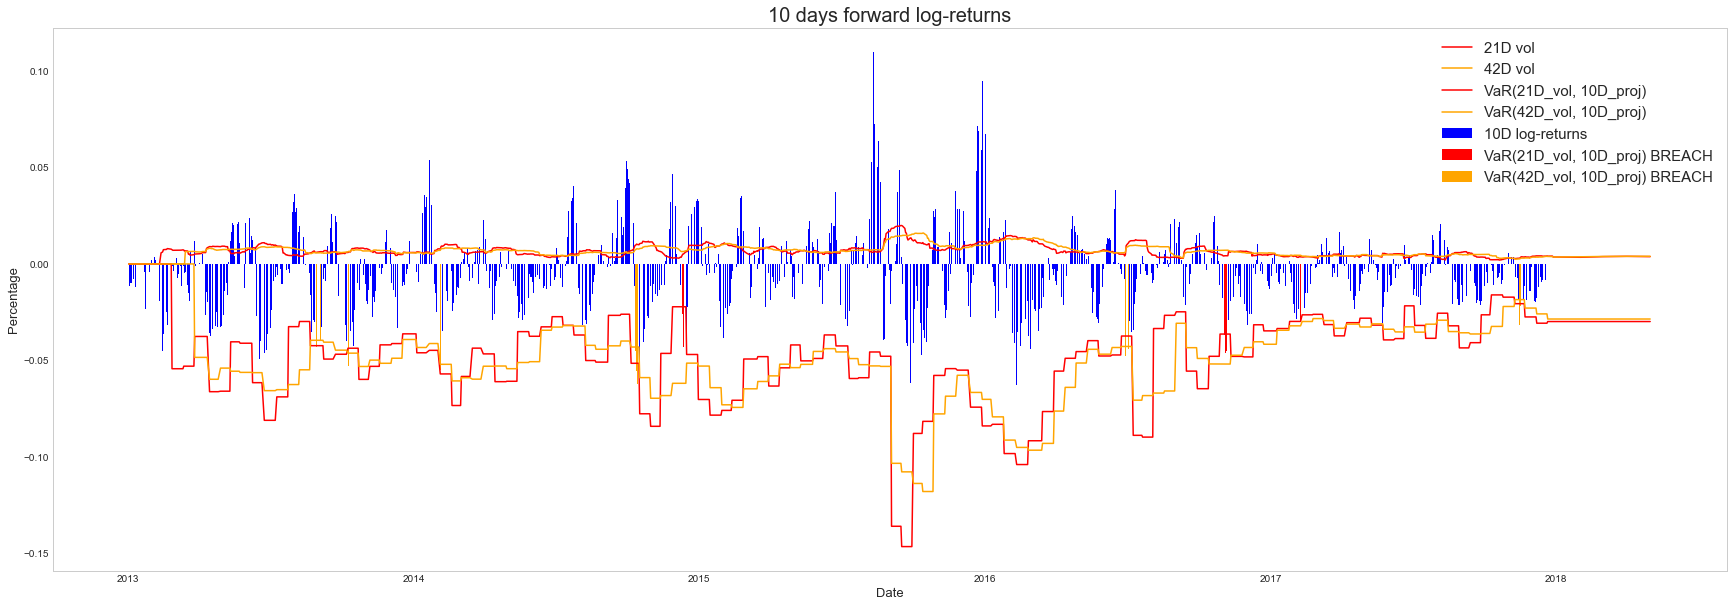

In [63]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.bar(x=close_prices.index, height=close_prices['10D_forward_log_ret'], label='10D log-returns', color='blue')
plt.plot(close_prices['21D_vol'], label='21D vol', color='red')
plt.plot(close_prices['42D_vol'], label='42D vol', color='orange')
plt.plot(close_prices['VAR_10Dproj_21D_vol'], label='VaR(21D_vol, 10D_proj)', color='red')
plt.plot(close_prices['VAR_10Dproj_42D_vol'], label='VaR(42D_vol, 10D_proj)', color='orange')
plt.bar(x=close_prices.index, height=breach_21D_vol_list['breach_21D_vol'], label='VaR(21D_vol, 10D_proj) BREACH', color='red')
plt.bar(x=close_prices.index, height=breach_42D_vol_list['breach_42D_vol'], label='VaR(42D_vol, 10D_proj) BREACH', color='orange')
plt.title('10 days forward log-returns', fontsize=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.legend(fontsize=15)
plt.grid(b=False);